In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Importation des données

In [44]:
data=pd.read_csv("titanic-passengers.csv",sep=";")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [45]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Preprocessing Data

In [46]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data['Embarked']=new_data.Cabin.fillna('S')
    return new_data
data=preprocess_data(data)

In [47]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Application du modèle

In [48]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7802690582959642


In [60]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
model1 = tree.DecisionTreeClassifier(min_impurity_split=0.2,max_depth=4,random_state=15)  
model1.fit(x_train, y_train)   #fitting our model
y_pred=model1.predict(x_test)   # evaluating our model

print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8026905829596412


C:\Users\SAKER\anaconda3\lib\site-packages\sklearn\tree\_classes.py:316: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


En changeant quelques paramètres tel que la profondeur , le split... ect On a pu gagné 2% de précision

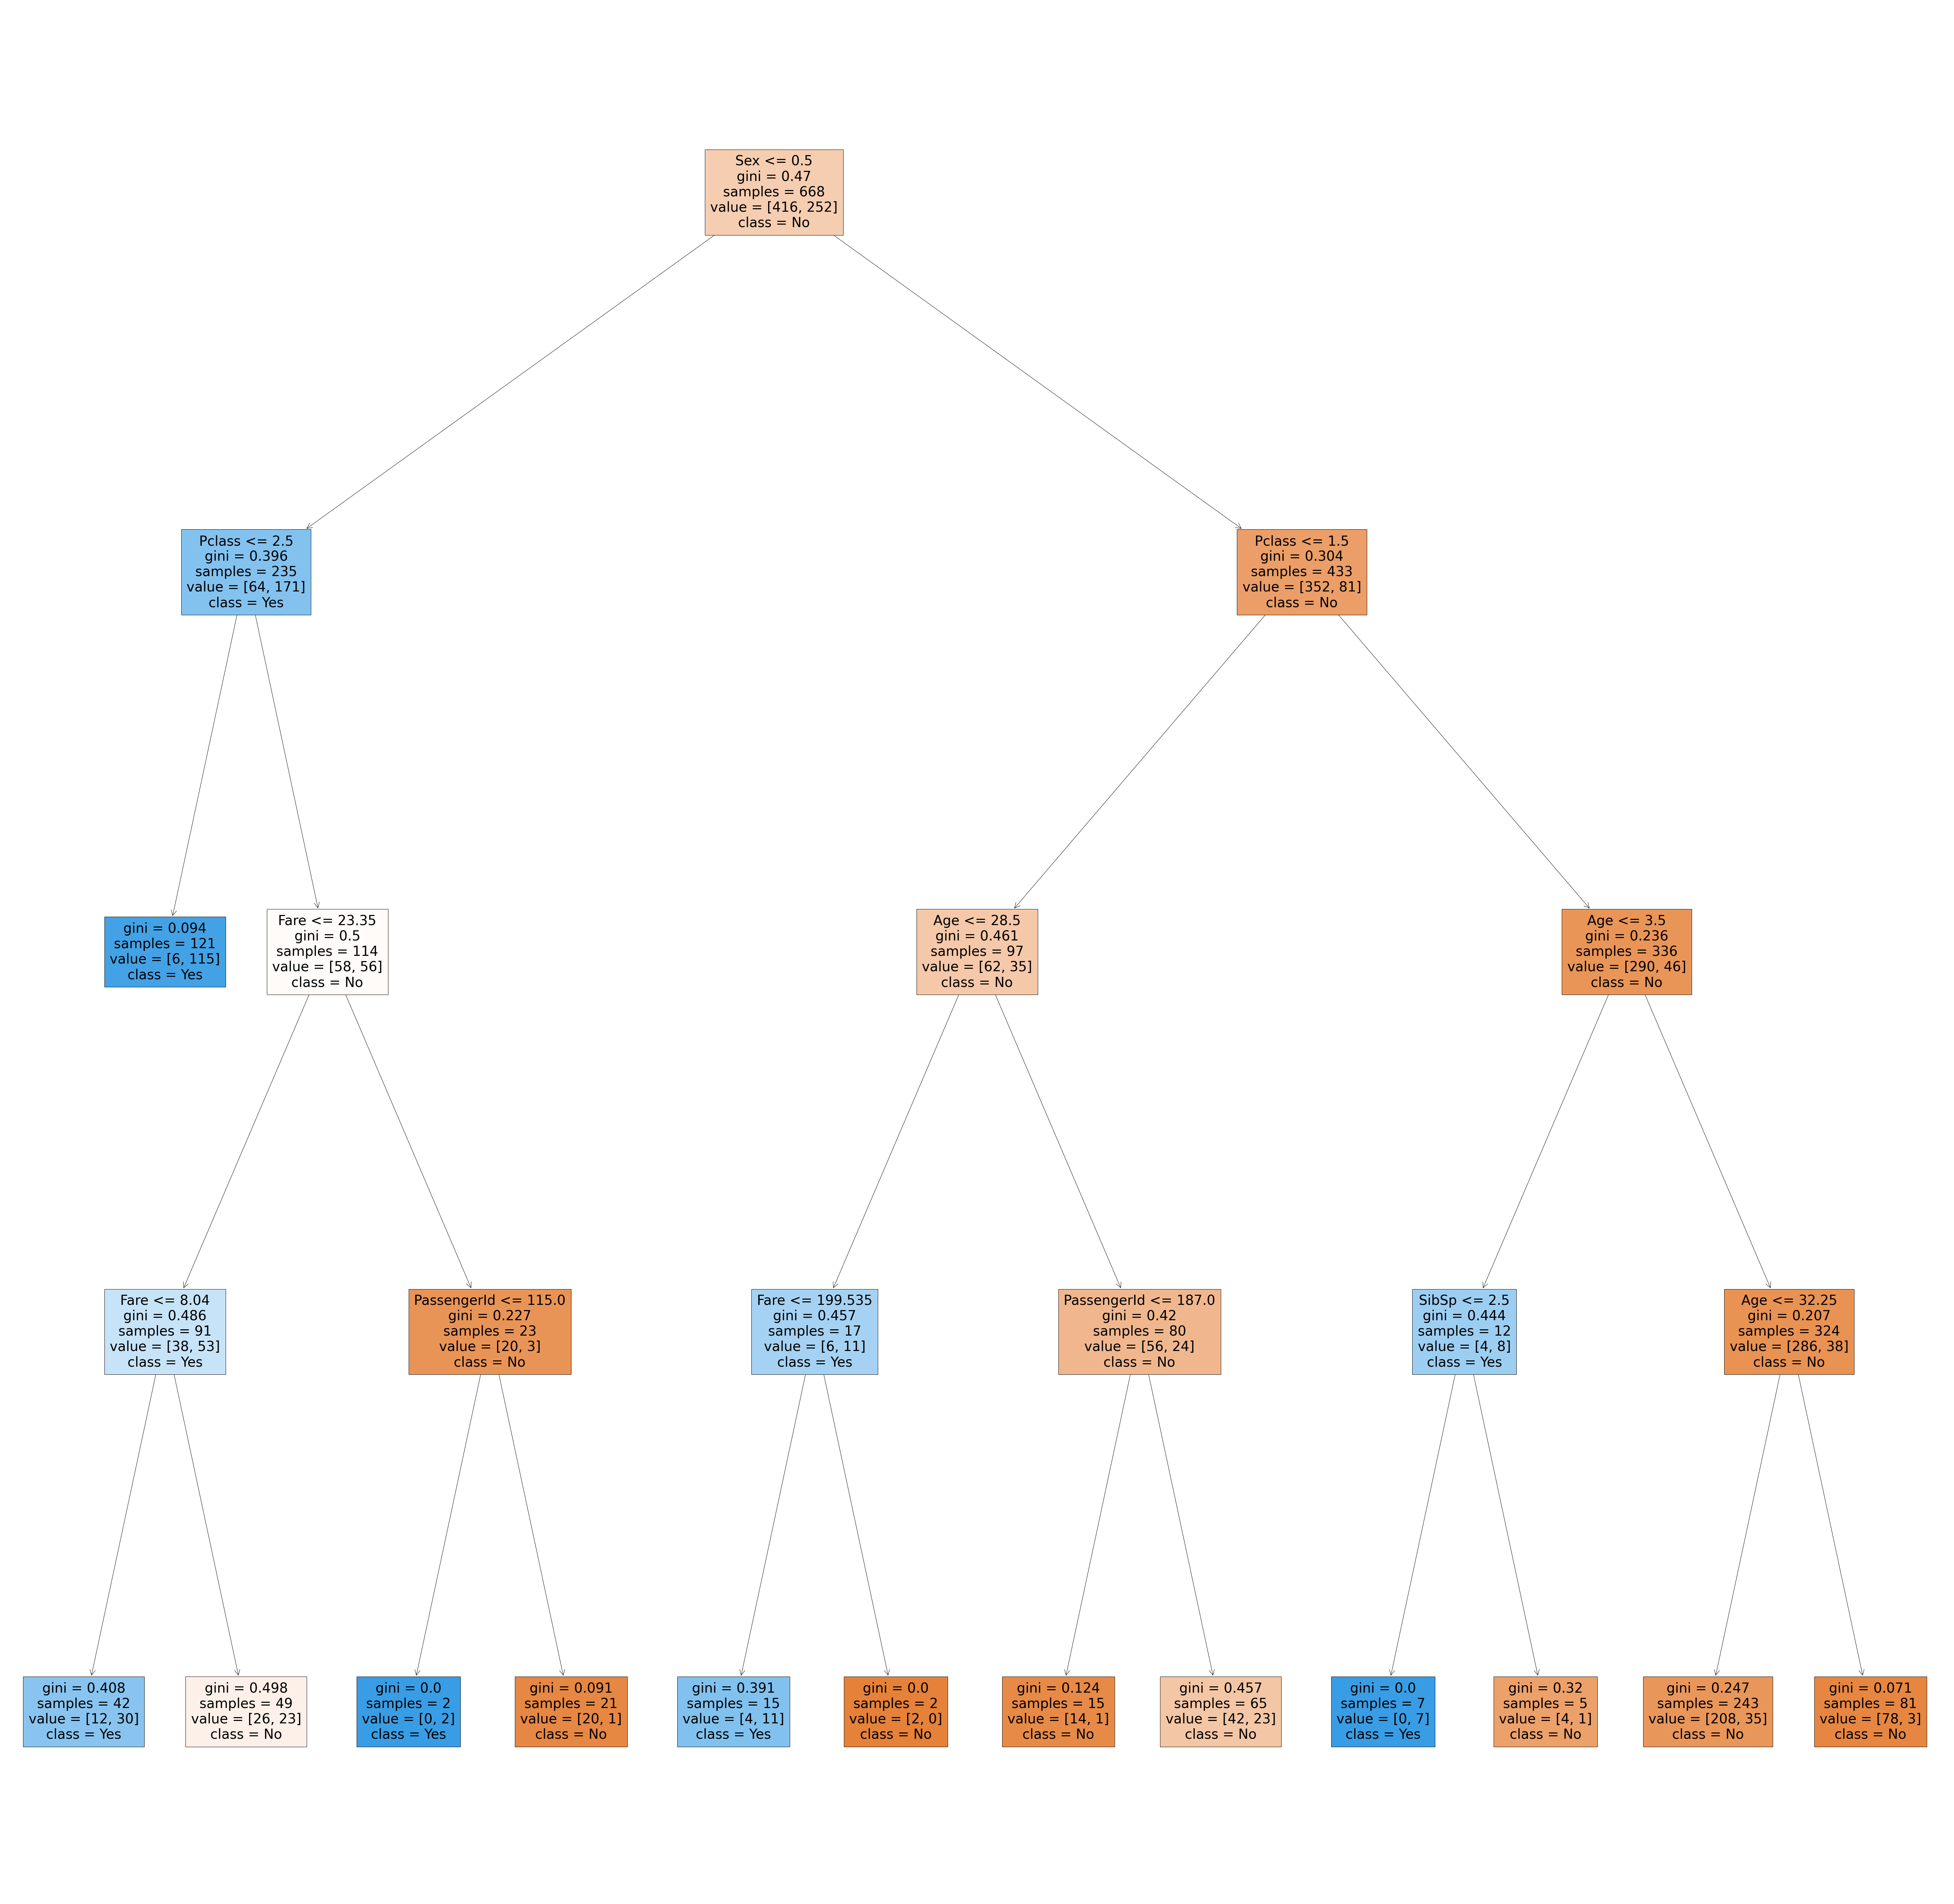

In [53]:
fig = plt.figure(figsize=(100,100))
tree.plot_tree(model1,
                   feature_names=x.columns.values.tolist(),  
                   class_names=data.Survived.unique(),
                   filled=True)
fig.savefig("tree1.png")

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [59]:
rf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with n decision trees
rf.fit(x_train, y_train)  #Training our model
y_pred=rf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8251121076233184


In [58]:
rf=RandomForestClassifier(n_estimators=800)  #Creating a random forest with n decision trees
rf.fit(x_train, y_train)  #Training our model
y_pred=rf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8654708520179372


En changeant le nombre d'abre de décision dans nôtre fôret on a pu avoir un gain de 4% et un gain de 6 % par rapport à la prédiction de l'arbre de décision 